# Train, Prune, and Quantize

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import helper
from squeezenet_model import SqueezeNetCIFAR10, SqueezeNetCIFAR10_QAT
from alexnet_model import AlexNetCIFAR10, AlexNetCIFAR10_QAT
from resnet32_model import ResNet, ResNetQAT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device={device}")

Device=cuda


In [2]:
# mname = "squeezenet"
mname = "alexnet"
# mname = "resnet"

if mname == "squeezenet":
    get_model = SqueezeNetCIFAR10
    get_model_qat = SqueezeNetCIFAR10_QAT
elif mname == "alexnet":
    get_model = AlexNetCIFAR10
    get_model_qat = AlexNetCIFAR10_QAT
elif mname == "resnet":
    get_model = ResNet
    get_model_qat = ResNetQAT

In [ ]:
train_loader, test_loader = helper.load_dataset(batch_size=128)

In [4]:
model_fp32 = get_model()
# model_fp32.load_model('squeezenet_bn_cifar10_fp32.pth')

total_params = sum(p.numel() for p in model_fp32.parameters())
print(f"Total parameters: {total_params}")

trainable_params = sum(p.numel() for p in model_fp32.parameters() if p.requires_grad)
print(f"Trainable parameters: {trainable_params}")

Total parameters: 1048330
Trainable parameters: 1048330


## Training

In [5]:
train, test = True, True
epochs = 100
fp32_metrics = helper.train_model(model=model_fp32,train_loader=train_loader,test_loader=test_loader,train=train,test=test,device=device,epochs=epochs)

Epoch [1/100] 

Train Loss: 1.8860, Train Acc: 27.55% 

Test/Val Loss: 1.6561, Test/Val Acc: 38.60%
Epoch [2/100] 

Train Loss: 1.5312, Train Acc: 43.94% 

Test/Val Loss: 1.2152, Test/Val Acc: 54.85%
Epoch [3/100] 

Train Loss: 1.3249, Train Acc: 51.86% 

Test/Val Loss: 1.0691, Test/Val Acc: 60.31%
Epoch [4/100] 

Train Loss: 1.1946, Train Acc: 56.85% 

Test/Val Loss: 0.9487, Test/Val Acc: 66.46%
Epoch [5/100] 

Train Loss: 1.0953, Train Acc: 60.93% 

Test/Val Loss: 0.8250, Test/Val Acc: 70.80%
Epoch [6/100] 

Train Loss: 1.0194, Train Acc: 63.63% 

Test/Val Loss: 0.8452, Test/Val Acc: 71.01%
Epoch [7/100] 

Train Loss: 0.9595, Train Acc: 65.97% 

Test/Val Loss: 0.7871, Test/Val Acc: 72.88%
Epoch [8/100] 

Train Loss: 0.9187, Train Acc: 67.78% 

Test/Val Loss: 0.7952, Test/Val Acc: 72.18%
Epoch [9/100] 

Train Loss: 0.8727, Train Acc: 69.47% 

Test/Val Loss: 0.7091, Test/Val Acc: 75.42%
Epoch [10/100] 

Train Loss: 0.8473, Train Acc: 70.34% 

Test/Val Loss: 0.7414, Test/Val Acc: 75.06%
Epoch [11/100] 

Train Loss: 0.8102, Train Acc: 71.63% 

Test/Val Loss: 0.6884, Test/Val Acc: 76.24%
Epoch [12/100] 

Train Loss: 0.7886, Train Acc: 72.52% 

Test/Val Loss: 0.5946, Test/Val Acc: 78.81%
Epoch [13/100] 

Train Loss: 0.7663, Train Acc: 73.30% 

Test/Val Loss: 0.5956, Test/Val Acc: 79.77%
Epoch [14/100] 

Train Loss: 0.7539, Train Acc: 73.61% 

Test/Val Loss: 0.5804, Test/Val Acc: 80.12%
Epoch [15/100] 

Train Loss: 0.7272, Train Acc: 74.65% 

Test/Val Loss: 0.5693, Test/Val Acc: 80.99%
Epoch [16/100] 

Train Loss: 0.7089, Train Acc: 75.45% 

Test/Val Loss: 0.5945, Test/Val Acc: 79.28%
Epoch [17/100] 

Train Loss: 0.7009, Train Acc: 75.46% 

Test/Val Loss: 0.5051, Test/Val Acc: 82.62%
Epoch [18/100] 

Train Loss: 0.6787, Train Acc: 76.64% 

Test/Val Loss: 0.5013, Test/Val Acc: 83.11%
Epoch [19/100] 

Train Loss: 0.6699, Train Acc: 76.90% 

Test/Val Loss: 0.5524, Test/Val Acc: 81.09%
Epoch [20/100] 

Train Loss: 0.6569, Train Acc: 77.09% 

Test/Val Loss: 0.5112, Test/Val Acc: 83.08%
Epoch [21/100] 

Train Loss: 0.6467, Train Acc: 77.35% 

Test/Val Loss: 0.4760, Test/Val Acc: 83.64%
Epoch [22/100] 

Train Loss: 0.6341, Train Acc: 77.94% 

Test/Val Loss: 0.7056, Test/Val Acc: 77.71%
Epoch [23/100] 

Train Loss: 0.6296, Train Acc: 78.26% 

Test/Val Loss: 0.4924, Test/Val Acc: 82.82%
Epoch [24/100] 

Train Loss: 0.6153, Train Acc: 78.61% 

Test/Val Loss: 0.4698, Test/Val Acc: 83.84%
Epoch [25/100] 

Train Loss: 0.6084, Train Acc: 78.82% 

Test/Val Loss: 0.4549, Test/Val Acc: 84.71%
Epoch [26/100] 

Train Loss: 0.6055, Train Acc: 79.10% 

Test/Val Loss: 0.4111, Test/Val Acc: 85.51%
Epoch [27/100] 

Train Loss: 0.5883, Train Acc: 79.59% 

Test/Val Loss: 0.4363, Test/Val Acc: 84.69%
Epoch [28/100] 

Train Loss: 0.5880, Train Acc: 79.48% 

Test/Val Loss: 0.4528, Test/Val Acc: 84.54%
Epoch [29/100] 

Train Loss: 0.5827, Train Acc: 79.65% 

Test/Val Loss: 0.4629, Test/Val Acc: 84.62%
Epoch [30/100] 

Train Loss: 0.5641, Train Acc: 80.33% 

Test/Val Loss: 0.4954, Test/Val Acc: 83.29%
Epoch [31/100] 

Train Loss: 0.5578, Train Acc: 80.67% 

Test/Val Loss: 0.4186, Test/Val Acc: 85.57%
Epoch [32/100] 

Train Loss: 0.5580, Train Acc: 80.55% 

Test/Val Loss: 0.4652, Test/Val Acc: 84.27%
Epoch [33/100] 

Train Loss: 0.5573, Train Acc: 80.65% 

Test/Val Loss: 0.4209, Test/Val Acc: 85.70%
Epoch [34/100] 

Train Loss: 0.5475, Train Acc: 80.89% 

Test/Val Loss: 0.4270, Test/Val Acc: 85.56%
Epoch [35/100] 

Train Loss: 0.5407, Train Acc: 81.41% 

Test/Val Loss: 0.4242, Test/Val Acc: 85.68%
Epoch [36/100] 

Train Loss: 0.5374, Train Acc: 81.34% 

Test/Val Loss: 0.4161, Test/Val Acc: 85.80%
Epoch [37/100] 

Train Loss: 0.5296, Train Acc: 81.48% 

Test/Val Loss: 0.4202, Test/Val Acc: 85.54%
Epoch [38/100] 

Train Loss: 0.5293, Train Acc: 81.53% 

Test/Val Loss: 0.4351, Test/Val Acc: 85.40%
Epoch [39/100] 

Train Loss: 0.5263, Train Acc: 81.68% 

Test/Val Loss: 0.4139, Test/Val Acc: 86.19%
Epoch [40/100] 

Train Loss: 0.5232, Train Acc: 81.67% 

Test/Val Loss: 0.3944, Test/Val Acc: 86.76%
Epoch [41/100] 

Train Loss: 0.5080, Train Acc: 82.25% 

Test/Val Loss: 0.3906, Test/Val Acc: 86.55%
Epoch [42/100] 

Train Loss: 0.5092, Train Acc: 82.29% 

Test/Val Loss: 0.4379, Test/Val Acc: 85.12%
Epoch [43/100] 

Train Loss: 0.5074, Train Acc: 82.37% 

Test/Val Loss: 0.4179, Test/Val Acc: 85.55%
Epoch [44/100] 

Train Loss: 0.5045, Train Acc: 82.53% 

Test/Val Loss: 0.4265, Test/Val Acc: 85.78%
Epoch [45/100] 

Train Loss: 0.4976, Train Acc: 82.72% 

Test/Val Loss: 0.4244, Test/Val Acc: 85.86%
Epoch [46/100] 

Train Loss: 0.4942, Train Acc: 82.82% 

Test/Val Loss: 0.4093, Test/Val Acc: 85.81%
Epoch [47/100] 

Train Loss: 0.4942, Train Acc: 82.64% 

Test/Val Loss: 0.3968, Test/Val Acc: 86.59%
Epoch [48/100] 

Train Loss: 0.4946, Train Acc: 82.83% 

Test/Val Loss: 0.4179, Test/Val Acc: 86.19%
Epoch [49/100] 

Train Loss: 0.4904, Train Acc: 82.82% 

Test/Val Loss: 0.4107, Test/Val Acc: 86.16%
Epoch [50/100] 

Train Loss: 0.4778, Train Acc: 83.35% 

Test/Val Loss: 0.3872, Test/Val Acc: 86.97%
Epoch [51/100] 

Train Loss: 0.4879, Train Acc: 82.99% 

Test/Val Loss: 0.4390, Test/Val Acc: 85.13%
Epoch [52/100] 

Train Loss: 0.4758, Train Acc: 83.34% 

Test/Val Loss: 0.4095, Test/Val Acc: 86.16%
Epoch [53/100] 

Train Loss: 0.4843, Train Acc: 83.21% 

Test/Val Loss: 0.3819, Test/Val Acc: 87.31%
Epoch [54/100] 

Train Loss: 0.4727, Train Acc: 83.63% 

Test/Val Loss: 0.3862, Test/Val Acc: 86.81%
Epoch [55/100] 

Train Loss: 0.4734, Train Acc: 83.57% 

Test/Val Loss: 0.4178, Test/Val Acc: 86.29%
Epoch [56/100] 

Train Loss: 0.4738, Train Acc: 83.47% 

Test/Val Loss: 0.3751, Test/Val Acc: 87.45%
Epoch [57/100] 

Train Loss: 0.4632, Train Acc: 83.81% 

Test/Val Loss: 0.3924, Test/Val Acc: 86.72%
Epoch [58/100] 

Train Loss: 0.4657, Train Acc: 83.92% 

Test/Val Loss: 0.3895, Test/Val Acc: 86.92%
Epoch [59/100] 

Train Loss: 0.4675, Train Acc: 83.98% 

Test/Val Loss: 0.4700, Test/Val Acc: 84.44%
Epoch [60/100] 

Train Loss: 0.4616, Train Acc: 83.84% 

Test/Val Loss: 0.3542, Test/Val Acc: 87.79%
Epoch [61/100] 

Train Loss: 0.4591, Train Acc: 84.14% 

Test/Val Loss: 0.3722, Test/Val Acc: 87.44%
Epoch [62/100] 

Train Loss: 0.4633, Train Acc: 83.83% 

Test/Val Loss: 0.3858, Test/Val Acc: 87.32%
Epoch [63/100] 

Train Loss: 0.4592, Train Acc: 83.93% 

Test/Val Loss: 0.4466, Test/Val Acc: 85.30%
Epoch [64/100] 

Train Loss: 0.4571, Train Acc: 83.91% 

Test/Val Loss: 0.3838, Test/Val Acc: 87.28%
Epoch [65/100] 

Train Loss: 0.4463, Train Acc: 84.46% 

Test/Val Loss: 0.3661, Test/Val Acc: 87.30%
Epoch [66/100] 

Train Loss: 0.4541, Train Acc: 84.20% 

Test/Val Loss: 0.3758, Test/Val Acc: 87.15%
Epoch [67/100] 

Train Loss: 0.4436, Train Acc: 84.56% 

Test/Val Loss: 0.3885, Test/Val Acc: 87.03%
Epoch [68/100] 

Train Loss: 0.4449, Train Acc: 84.53% 

Test/Val Loss: 0.3722, Test/Val Acc: 87.57%
Epoch [69/100] 

Train Loss: 0.4445, Train Acc: 84.51% 

Test/Val Loss: 0.4045, Test/Val Acc: 86.84%
Epoch [70/100] 

Train Loss: 0.4410, Train Acc: 84.63% 

Test/Val Loss: 0.3647, Test/Val Acc: 87.65%
Epoch [71/100] 

Train Loss: 0.4408, Train Acc: 84.76% 

Test/Val Loss: 0.4265, Test/Val Acc: 85.82%
Epoch [72/100] 

Train Loss: 0.4414, Train Acc: 84.56% 

Test/Val Loss: 0.3637, Test/Val Acc: 87.55%
Epoch [73/100] 

Train Loss: 0.4446, Train Acc: 84.69% 

Test/Val Loss: 0.3494, Test/Val Acc: 88.30%
Epoch [74/100] 

Train Loss: 0.4370, Train Acc: 84.85% 

Test/Val Loss: 0.3828, Test/Val Acc: 87.68%
Epoch [75/100] 

Train Loss: 0.4383, Train Acc: 84.75% 

Test/Val Loss: 0.3809, Test/Val Acc: 87.44%
Epoch [76/100] 

Train Loss: 0.4358, Train Acc: 84.80% 

Test/Val Loss: 0.3696, Test/Val Acc: 87.93%
Epoch [77/100] 

Train Loss: 0.4330, Train Acc: 84.84% 

Test/Val Loss: 0.4017, Test/Val Acc: 86.74%
Epoch [78/100] 

Train Loss: 0.4270, Train Acc: 85.03% 

Test/Val Loss: 0.3644, Test/Val Acc: 88.09%
Epoch [79/100] 

Train Loss: 0.4325, Train Acc: 84.89% 

Test/Val Loss: 0.3780, Test/Val Acc: 87.33%
Epoch [80/100] 

Train Loss: 0.4284, Train Acc: 85.08% 

Test/Val Loss: 0.3862, Test/Val Acc: 87.31%
Epoch [81/100] 

Train Loss: 0.4349, Train Acc: 84.77% 

Test/Val Loss: 0.3765, Test/Val Acc: 87.49%
Epoch [82/100] 

Train Loss: 0.4264, Train Acc: 85.08% 

Test/Val Loss: 0.3753, Test/Val Acc: 87.63%
Epoch [83/100] 

Train Loss: 0.4246, Train Acc: 85.10% 

Test/Val Loss: 0.3912, Test/Val Acc: 87.60%
Epoch [84/100] 

Train Loss: 0.4223, Train Acc: 85.18% 

Test/Val Loss: 0.3788, Test/Val Acc: 87.49%
Epoch [85/100] 

Train Loss: 0.4269, Train Acc: 85.12% 

Test/Val Loss: 0.3697, Test/Val Acc: 87.71%
Epoch [86/100] 

Train Loss: 0.4178, Train Acc: 85.41% 

Test/Val Loss: 0.3538, Test/Val Acc: 87.81%
Epoch [87/100] 

Train Loss: 0.4209, Train Acc: 85.31% 

Test/Val Loss: 0.3729, Test/Val Acc: 87.69%
Epoch [88/100] 

Train Loss: 0.4196, Train Acc: 85.49% 

Test/Val Loss: 0.3468, Test/Val Acc: 87.83%
Epoch [89/100] 

Train Loss: 0.4143, Train Acc: 85.45% 

Test/Val Loss: 0.3888, Test/Val Acc: 87.25%
Epoch [90/100] 

Train Loss: 0.4181, Train Acc: 85.35% 

Test/Val Loss: 0.3663, Test/Val Acc: 88.11%
Epoch [91/100] 

Train Loss: 0.4165, Train Acc: 85.60% 

Test/Val Loss: 0.3537, Test/Val Acc: 88.22%
Epoch [92/100] 

Train Loss: 0.4156, Train Acc: 85.53% 

Test/Val Loss: 0.3946, Test/Val Acc: 87.47%
Epoch [93/100] 

Train Loss: 0.4230, Train Acc: 85.43% 

Test/Val Loss: 0.3539, Test/Val Acc: 88.06%
Epoch [94/100] 

Train Loss: 0.4168, Train Acc: 85.36% 

Test/Val Loss: 0.3775, Test/Val Acc: 87.67%
Epoch [95/100] 

Train Loss: 0.4140, Train Acc: 85.42% 

Test/Val Loss: 0.3463, Test/Val Acc: 88.78%
Epoch [96/100] 

Train Loss: 0.4091, Train Acc: 85.76% 

Test/Val Loss: 0.4223, Test/Val Acc: 86.29%
Epoch [97/100] 

Train Loss: 0.4180, Train Acc: 85.37% 

Test/Val Loss: 0.3513, Test/Val Acc: 88.27%
Epoch [98/100] 

Train Loss: 0.4111, Train Acc: 85.57% 

Test/Val Loss: 0.3653, Test/Val Acc: 87.67%
Epoch [99/100] 

Train Loss: 0.4114, Train Acc: 85.63% 

Test/Val Loss: 0.3694, Test/Val Acc: 87.90%
Epoch [100/100] 

Train Loss: 0.4072, Train Acc: 85.80% 

Test/Val Loss: 0.3568, Test/Val Acc: 88.13%


In [6]:
# model_fp32.save_model(f"{mname}_fp32.pth")
torch.save(model_fp32.state_dict(), f"{mname}_fp32.pth")

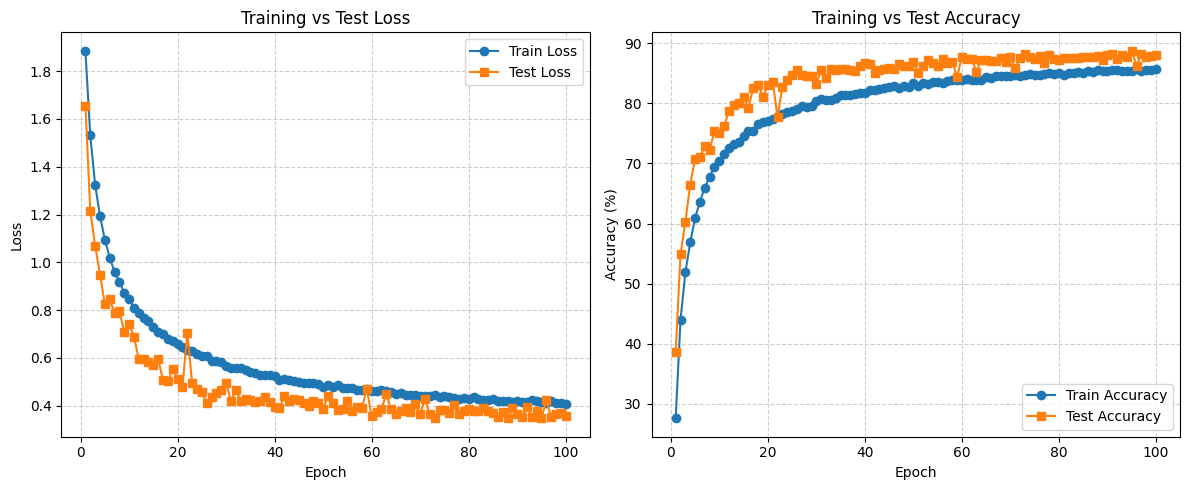

In [7]:
helper.plot_metrics(fp32_metrics)

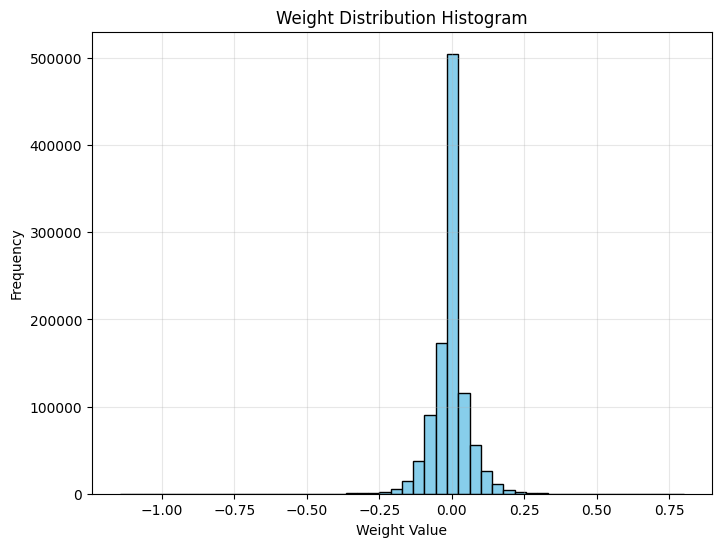

In [8]:
helper.plot_weight_histogram(model_fp32)

## Pruning

In [9]:
model = get_model()
model.load_model(f"{mname}_fp32.pth", device=device)
model.train()

Model loaded from alexnet_fp32.pth


AlexNetCIFAR10(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): Conv

In [10]:
import copy
import torch.nn.utils.prune as prune

prune_levels = [(0.1,'10'), (0.3,'30'), (0.5,'50'), (0.7,'70')]
results = []

best = 0.0
best_name = ""

for p, pname in prune_levels:
    m = copy.deepcopy(model)

    parameters_to_prune = []
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            parameters_to_prune.append((module, "weight"))

    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=p
    )

    # fine-tune
    metrics = helper.train_model(model=m,train_loader=train_loader,test_loader=test_loader,device=device)

    # remove pruning masks
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.remove(module, "weight")

    percent = p * 100
    fname = f"{mname}_{pname}.pth"
    # m.save_model(fname)
    torch.save(model_fp32.state_dict(), fname)
    
    acc = helper.evaluate(m,test_loader,device)
    if acc > best:
        best = acc
        best_name = fname

    results.append((p, metrics))

Epoch [1/10] 

Train Loss: 0.4107, Train Acc: 85.77% 

Test/Val Loss: 0.3575, Test/Val Acc: 88.19%
Epoch [2/10] 

Train Loss: 0.4142, Train Acc: 85.55% 

Test/Val Loss: 0.3635, Test/Val Acc: 88.02%
Epoch [3/10] 

Train Loss: 0.4136, Train Acc: 85.54% 

Test/Val Loss: 0.4004, Test/Val Acc: 87.23%
Epoch [4/10] 

Train Loss: 0.4081, Train Acc: 85.93% 

Test/Val Loss: 0.3369, Test/Val Acc: 88.93%
Epoch [5/10] 

Train Loss: 0.4041, Train Acc: 86.00% 

Test/Val Loss: 0.3346, Test/Val Acc: 88.63%
Epoch [6/10] 

Train Loss: 0.4073, Train Acc: 85.75% 

Test/Val Loss: 0.3757, Test/Val Acc: 87.46%
Epoch [7/10] 

Train Loss: 0.4000, Train Acc: 86.14% 

Test/Val Loss: 0.4032, Test/Val Acc: 87.33%
Epoch [8/10] 

Train Loss: 0.4027, Train Acc: 86.13% 

Test/Val Loss: 0.3632, Test/Val Acc: 88.45%
Epoch [9/10] 

Train Loss: 0.4028, Train Acc: 85.90% 

Test/Val Loss: 0.3559, Test/Val Acc: 88.35%
Epoch [10/10] 

Train Loss: 0.4043, Train Acc: 85.89% 

Test/Val Loss: 0.3452, Test/Val Acc: 88.57%


Epoch [1/10] 

Train Loss: 0.4059, Train Acc: 85.87% 

Test/Val Loss: 0.3664, Test/Val Acc: 87.99%
Epoch [2/10] 

Train Loss: 0.4086, Train Acc: 85.93% 

Test/Val Loss: 0.3786, Test/Val Acc: 87.47%
Epoch [3/10] 

Train Loss: 0.4054, Train Acc: 86.14% 

Test/Val Loss: 0.3768, Test/Val Acc: 87.89%
Epoch [4/10] 

Train Loss: 0.4015, Train Acc: 86.01% 

Test/Val Loss: 0.3650, Test/Val Acc: 88.16%
Epoch [5/10] 

Train Loss: 0.4038, Train Acc: 85.93% 

Test/Val Loss: 0.3645, Test/Val Acc: 88.13%
Epoch [6/10] 

Train Loss: 0.3979, Train Acc: 86.14% 

Test/Val Loss: 0.3864, Test/Val Acc: 87.54%
Epoch [7/10] 

Train Loss: 0.4062, Train Acc: 85.91% 

Test/Val Loss: 0.3423, Test/Val Acc: 88.95%
Epoch [8/10] 

Train Loss: 0.3969, Train Acc: 86.27% 

Test/Val Loss: 0.3662, Test/Val Acc: 87.91%
Epoch [9/10] 

Train Loss: 0.4087, Train Acc: 85.70% 

Test/Val Loss: 0.3983, Test/Val Acc: 86.89%
Epoch [10/10] 

Train Loss: 0.4040, Train Acc: 85.90% 

Test/Val Loss: 0.3492, Test/Val Acc: 88.48%


Epoch [1/10] 

Train Loss: 0.3911, Train Acc: 86.48% 

Test/Val Loss: 0.3498, Test/Val Acc: 88.60%
Epoch [2/10] 

Train Loss: 0.3912, Train Acc: 86.35% 

Test/Val Loss: 0.3420, Test/Val Acc: 88.97%
Epoch [3/10] 

Train Loss: 0.3843, Train Acc: 86.70% 

Test/Val Loss: 0.3567, Test/Val Acc: 88.66%
Epoch [4/10] 

Train Loss: 0.3861, Train Acc: 86.59% 

Test/Val Loss: 0.3465, Test/Val Acc: 89.03%
Epoch [5/10] 

Train Loss: 0.3875, Train Acc: 86.54% 

Test/Val Loss: 0.3522, Test/Val Acc: 88.89%
Epoch [6/10] 

Train Loss: 0.3828, Train Acc: 86.56% 

Test/Val Loss: 0.3453, Test/Val Acc: 88.78%
Epoch [7/10] 

Train Loss: 0.3908, Train Acc: 86.54% 

Test/Val Loss: 0.3314, Test/Val Acc: 89.08%
Epoch [8/10] 

Train Loss: 0.3801, Train Acc: 86.85% 

Test/Val Loss: 0.3579, Test/Val Acc: 88.53%
Epoch [9/10] 

Train Loss: 0.3818, Train Acc: 86.69% 

Test/Val Loss: 0.3810, Test/Val Acc: 87.57%
Epoch [10/10] 

Train Loss: 0.3815, Train Acc: 86.65% 

Test/Val Loss: 0.3519, Test/Val Acc: 88.67%


Epoch [1/10] 

Train Loss: 0.3904, Train Acc: 86.33% 

Test/Val Loss: 0.3245, Test/Val Acc: 89.40%
Epoch [2/10] 

Train Loss: 0.3843, Train Acc: 86.70% 

Test/Val Loss: 0.3401, Test/Val Acc: 88.99%
Epoch [3/10] 

Train Loss: 0.3750, Train Acc: 86.87% 

Test/Val Loss: 0.3451, Test/Val Acc: 88.85%
Epoch [4/10] 

Train Loss: 0.3741, Train Acc: 86.99% 

Test/Val Loss: 0.3383, Test/Val Acc: 89.19%
Epoch [5/10] 

Train Loss: 0.3743, Train Acc: 86.95% 

Test/Val Loss: 0.3555, Test/Val Acc: 88.32%
Epoch [6/10] 

Train Loss: 0.3687, Train Acc: 87.26% 

Test/Val Loss: 0.3655, Test/Val Acc: 88.51%
Epoch [7/10] 

Train Loss: 0.3707, Train Acc: 87.15% 

Test/Val Loss: 0.3483, Test/Val Acc: 89.04%
Epoch [8/10] 

Train Loss: 0.3622, Train Acc: 87.43% 

Test/Val Loss: 0.3237, Test/Val Acc: 89.81%
Epoch [9/10] 

Train Loss: 0.3682, Train Acc: 87.19% 

Test/Val Loss: 0.3507, Test/Val Acc: 88.59%
Epoch [10/10] 

Train Loss: 0.3699, Train Acc: 87.14% 

Test/Val Loss: 0.3338, Test/Val Acc: 89.14%


Metrics for pruning with p=0.1


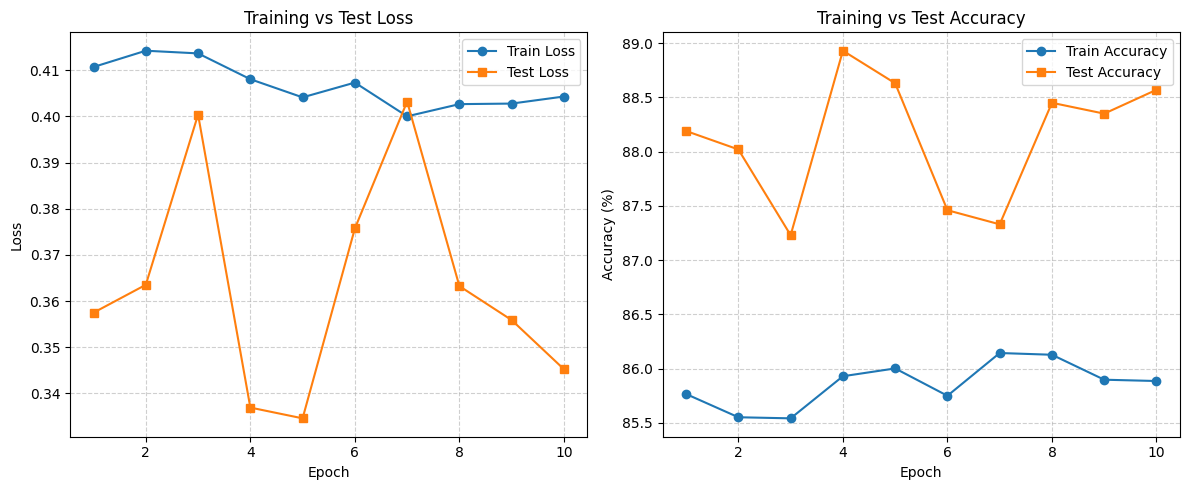

Metrics for pruning with p=0.3


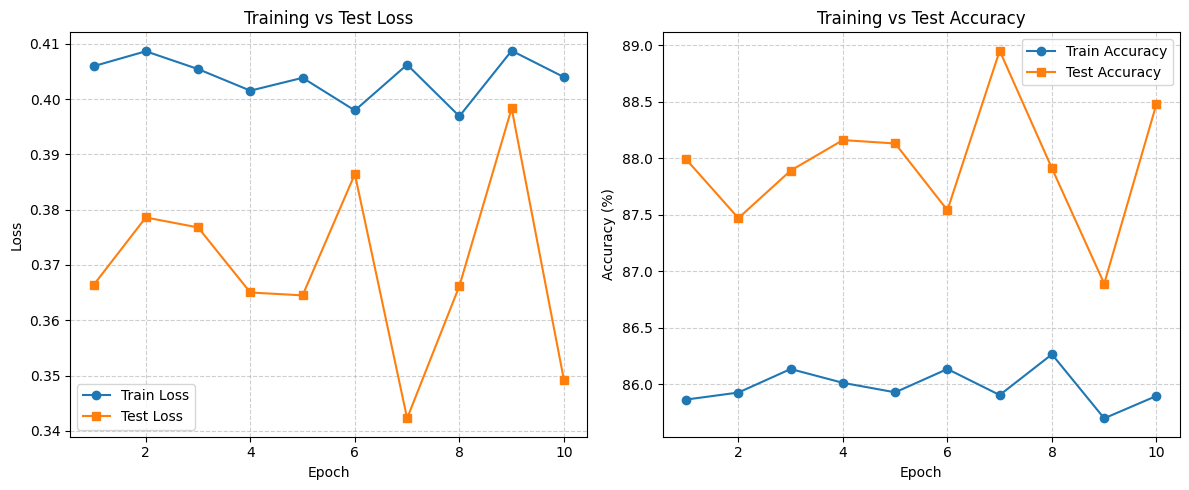

Metrics for pruning with p=0.5


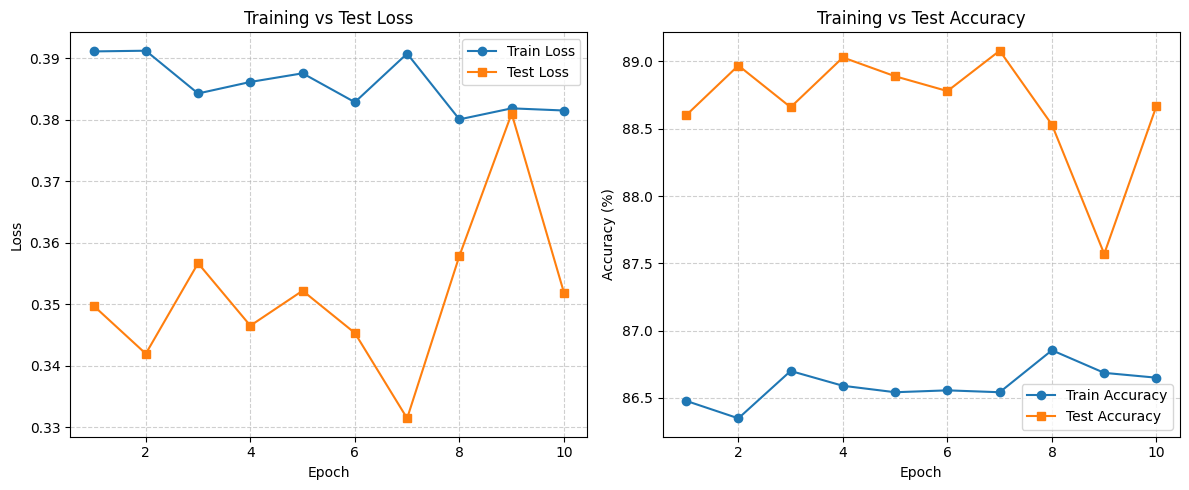

Metrics for pruning with p=0.7


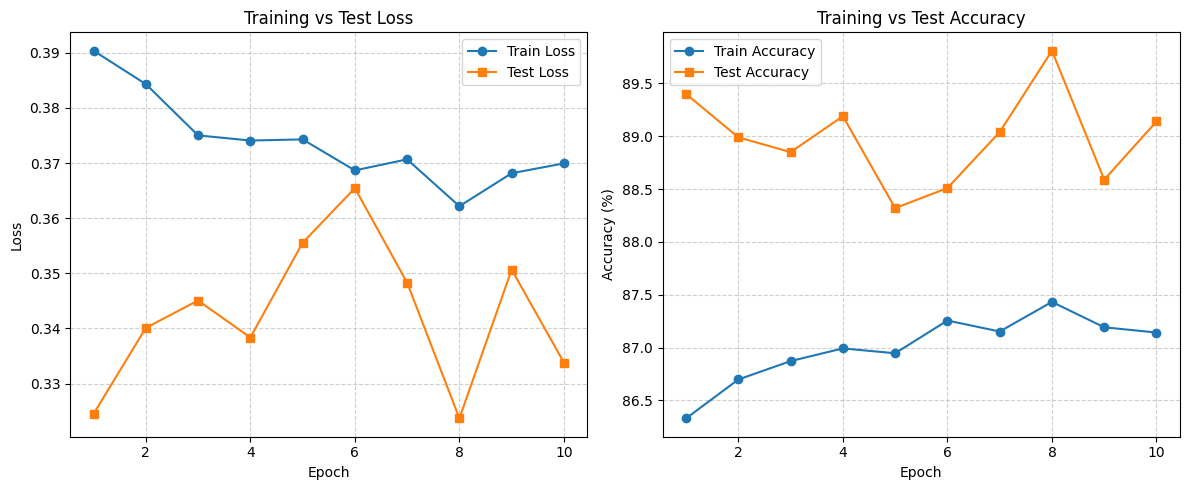

In [11]:
for p, metrics in results:
    print(f"Metrics for pruning with p={p}")
    helper.plot_metrics(metrics)

## Quantization Aware Training

In [12]:
import torch
from torch.ao.quantization import get_default_qat_qconfig
from torch.ao.quantization.quantize_fx import prepare_qat_fx, convert_fx

model_qat = get_model_qat()
# model_qat.load_model(best_name, device='cpu')
state_dict = torch.load(best_name)
model_fp32.load_state_dict(state_dict)
model_qat.eval()

# example input for FX tracing
example_inputs = (torch.randn(1, 3, 32, 32, device='cpu'),)

# QAT config dictionary, default 8-bit symmetric QAT
qconfig_dict = {"": get_default_qat_qconfig('fbgemm')}

# prepare the model for QAT
model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)

model_qat_prepared.to(device)
model_qat_prepared.train()

/tmp/SLURM_5266958/ipykernel_2730904/2910714172.py:18: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)
/home1/kodachi/.conda/envs/ee599/lib/python3.12/site-packages/torch/ao/quantization/quantize_fx.py:146: FutureWarning: Passing a QConfig dictionary to prepare is deprecated and wil

GraphModule(
  (activation_post_process_0): FusedMovingAvgObsFakeQuantize(
    fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.quint8, quant_min=0, quant_max=127, qscheme=torch.per_tensor_affine, reduce_range=True
    (activation_post_process): MovingAverageMinMaxObserver(min_val=inf, max_val=-inf)
  )
  (features): Module(
    (0): ConvBnReLU2d(
      3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (weight_fake_quant): FusedMovingAvgObsFakeQuantize(
        fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.qint8, quant_min=-128, quant_max=127, qscheme=torch.per_channel_symm

In [13]:
qat_metrics = helper.train_model(model=model_qat_prepared,train_loader=train_loader,test_loader=test_loader,device=device,epochs=20)

Epoch [1/20] 

Train Loss: 1.9455, Train Acc: 24.92% 

Test/Val Loss: 1.6738, Test/Val Acc: 36.48%
Epoch [2/20] 

Train Loss: 1.5895, Train Acc: 41.05% 

Test/Val Loss: 1.3270, Test/Val Acc: 50.92%
Epoch [3/20] 

Train Loss: 1.3776, Train Acc: 49.95% 

Test/Val Loss: 1.0854, Test/Val Acc: 60.80%
Epoch [4/20] 

Train Loss: 1.2345, Train Acc: 55.66% 

Test/Val Loss: 1.0673, Test/Val Acc: 63.00%
Epoch [5/20] 

Train Loss: 1.1171, Train Acc: 59.82% 

Test/Val Loss: 0.9496, Test/Val Acc: 67.68%
Epoch [6/20] 

Train Loss: 1.0374, Train Acc: 63.18% 

Test/Val Loss: 0.9000, Test/Val Acc: 67.45%
Epoch [7/20] 

Train Loss: 0.9792, Train Acc: 65.29% 

Test/Val Loss: 0.8548, Test/Val Acc: 71.03%
Epoch [8/20] 

Train Loss: 0.9196, Train Acc: 67.78% 

Test/Val Loss: 0.7719, Test/Val Acc: 73.50%
Epoch [9/20] 

Train Loss: 0.8831, Train Acc: 68.90% 

Test/Val Loss: 0.7028, Test/Val Acc: 75.85%
Epoch [10/20] 

Train Loss: 0.8502, Train Acc: 70.23% 

Test/Val Loss: 0.6463, Test/Val Acc: 77.80%
Epoch [11/20] 

Train Loss: 0.8113, Train Acc: 71.77% 

Test/Val Loss: 0.6683, Test/Val Acc: 75.81%
Epoch [12/20] 

Train Loss: 0.7884, Train Acc: 72.62% 

Test/Val Loss: 0.6625, Test/Val Acc: 76.96%
Epoch [13/20] 

Train Loss: 0.7670, Train Acc: 73.29% 

Test/Val Loss: 0.7147, Test/Val Acc: 74.92%
Epoch [14/20] 

Train Loss: 0.7478, Train Acc: 73.63% 

Test/Val Loss: 0.5792, Test/Val Acc: 80.34%
Epoch [15/20] 

Train Loss: 0.7220, Train Acc: 74.79% 

Test/Val Loss: 0.6099, Test/Val Acc: 79.06%
Epoch [16/20] 

Train Loss: 0.7135, Train Acc: 75.29% 

Test/Val Loss: 0.5279, Test/Val Acc: 81.85%
Epoch [17/20] 

Train Loss: 0.6924, Train Acc: 75.99% 

Test/Val Loss: 0.5712, Test/Val Acc: 80.41%
Epoch [18/20] 

Train Loss: 0.6750, Train Acc: 76.42% 

Test/Val Loss: 0.6160, Test/Val Acc: 79.07%
Epoch [19/20] 

Train Loss: 0.6670, Train Acc: 76.79% 

Test/Val Loss: 0.5608, Test/Val Acc: 80.83%
Epoch [20/20] 

Train Loss: 0.6535, Train Acc: 77.42% 

Test/Val Loss: 0.5116, Test/Val Acc: 82.33%


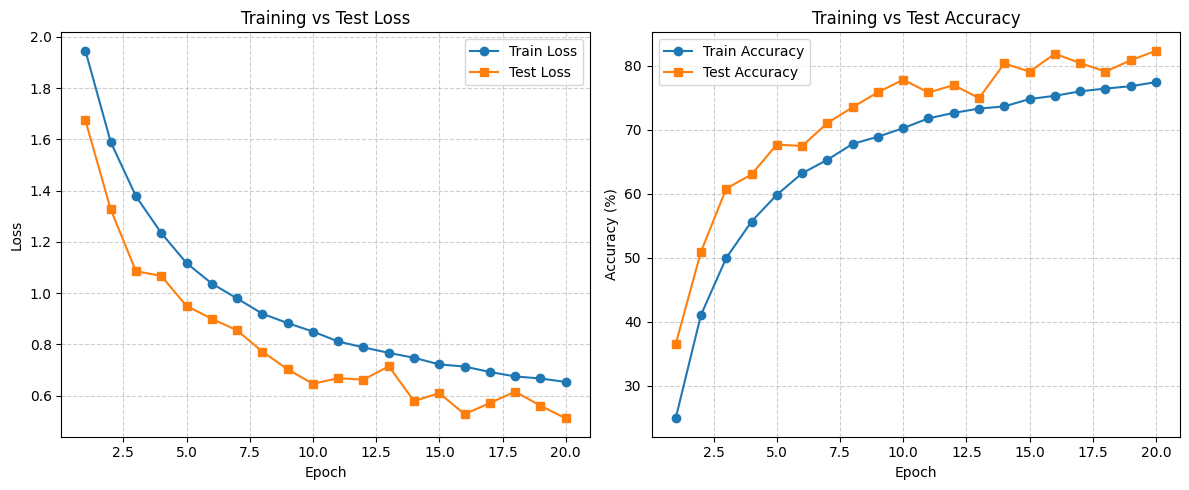

In [14]:
helper.plot_metrics(qat_metrics)

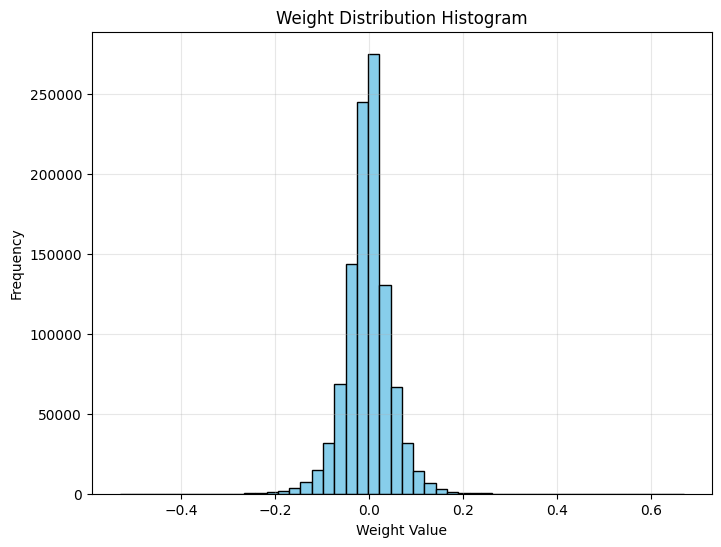

In [15]:
helper.plot_weight_histogram(model_qat_prepared)

In [16]:
model_qat_prepared.eval()
torch.save(model_qat_prepared.state_dict(), f"{mname}_qat_preconvert.pth")
# model_int8 = convert_fx(model_qat_prepared.cpu())
# torch.save(model_int8.state_dict(), "squeezenet_int8_qat.pth")